# Multiple Linear Regression Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import statsmodels.api as sm


In [15]:
data = pd.read_csv("../datasets/corn_allometric_biomass.csv")
data.head(5)


,height_cm,stem_diam_mm,dry_biomass_g
0,71.0,5.7,0.66
1,39.0,4.4,0.19
2,55.5,4.3,0.30
3,41.5,3.7,0.16
4,40.0,3.6,0.14


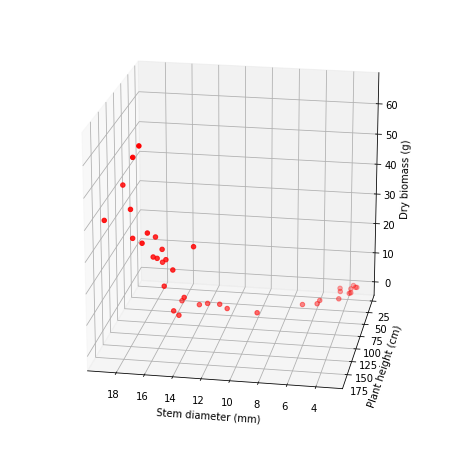

In [20]:
# Plot raw dataa and fitted model
# Necessary import for 3d plots.
# Great tutorial: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data.dry_biomass_g
xdata = data.stem_diam_mm
ydata = data.height_cm
ax.scatter3D(xdata, ydata, zdata, c='r');
ax.set_xlabel('Stem diameter (mm)') 
ax.set_ylabel('Plant height (cm)')
ax.set_zlabel('Dry biomass (g)')

ax.view_init(elev=20, azim=100)
plt.show()

# elev=None, azim=None
# elev = elevation angle in the z plane.
# azim = stores the azimuth angle in the x,y plane.


In [21]:
# Multiple Linear Regression using Python- and Matlab-style formula input
# Requires specifying the intercept using an array of ones.
# Full model
X = np.column_stack((np.ones(data.shape[0]),
                     data.height_cm,
                     data.stem_diam_mm,
                     data.height_cm * data.stem_diam_mm))  # interaction term

X

array([[1.00000e+00, 7.10000e+01, 5.70000e+00, 4.04700e+02],
       [1.00000e+00, 3.90000e+01, 4.40000e+00, 1.71600e+02],
       [1.00000e+00, 5.55000e+01, 4.30000e+00, 2.38650e+02],
       [1.00000e+00, 4.15000e+01, 3.70000e+00, 1.53550e+02],
       [1.00000e+00, 4.00000e+01, 3.60000e+00, 1.44000e+02],
       [1.00000e+00, 7.70000e+01, 6.70000e+00, 5.15900e+02],
       [1.00000e+00, 6.40000e+01, 5.60000e+00, 3.58400e+02],
       [1.00000e+00, 1.12000e+02, 9.50000e+00, 1.06400e+03],
       [1.00000e+00, 1.81000e+02, 1.71000e+01, 3.09510e+03],
       [1.00000e+00, 1.70000e+02, 1.59000e+01, 2.70300e+03],
       [1.00000e+00, 1.89000e+02, 1.64000e+01, 3.09960e+03],
       [1.00000e+00, 1.71000e+02, 1.56000e+01, 2.66760e+03],
       [1.00000e+00, 1.84000e+02, 1.60000e+01, 2.94400e+03],
       [1.00000e+00, 1.86000e+02, 1.69000e+01, 3.14340e+03],
       [1.00000e+00, 1.71000e+02, 1.45000e+01, 2.47950e+03],
       [1.00000e+00, 1.82000e+02, 1.72000e+01, 3.13040e+03],
       [1.00000e+00, 1.8

In [12]:
# Run Ordinary Least Squares to fit the model
model = sm.OLS(data.dry_biomass_g, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     63.71
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           4.87e-14
Time:                        14:23:31   Log-Likelihood:                -129.26
No. Observations:                  38   AIC:                             266.5
Df Residuals:                      34   BIC:                             273.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8097      6.022      3.124      0.0

>Height (x1) does not seem to be significant (high p-value and ranges including zero value). Run again prunning non-significant variables. Cannot remove the variables and use previous coefficients!

In [22]:
# Run a prunned model
X = np.column_stack((np.ones(data.shape[0]), data.stem_diam_mm, data.height_cm*data.stem_diam_mm))

model_prunned = sm.OLS(data.dry_biomass_g, X)
results_prunned = model_prunned.fit()
print(results_prunned.summary())

results_prunned.params

# New fitting has:
# r-squared remains similar
# one less parameter
# Higher F-Statistic 90 vs 63
# AIC remains similar

                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     90.81
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.40e-14
Time:                        15:35:06   Log-Likelihood:                -130.54
No. Observations:                  38   AIC:                             267.1
Df Residuals:                      35   BIC:                             272.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0338      5.263      2.666      0.0

const    14.033781
x1       -5.092159
x2        0.036719
dtype: float64

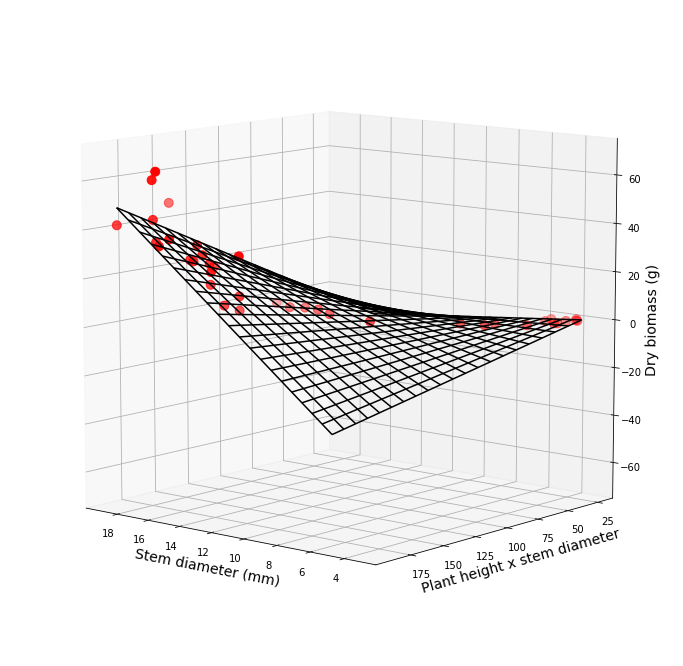

In [24]:
# Plot points with predicted model (which is a surface)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points (same code as in previous plot)
zdata = data.dry_biomass_g
xdata = data.stem_diam_mm
ydata = data.height_cm
ax.scatter3D(xdata, ydata, zdata, c='r', s=80);
ax.set_xlabel('Stem diameter (mm)')
ax.set_ylabel('Plant height (cm)')
ax.set_zlabel('Dry biomass (g)')

# Xgrid is grid of stem diameter
x = np.linspace(data.stem_diam_mm.min(), data.stem_diam_mm.max(), 21)

# Ygrid is grid of plant height
y = np.linspace(data.height_cm.min(), data.height_cm.max(), 21)

# We generate a 2D grid
Xgrid, Ygrid = np.meshgrid(x, y)

intercept = np.ones(Xgrid.shape)

# Z is the elevation of this 2D grid
# You can also use the sm.OLS.predict() method but I decided  to do it this way to show 
# few more details
Zgrid = intercept*results_prunned.params[0] + Xgrid*results_prunned.params[1] + Xgrid*Ygrid*results_prunned.params[2]

# Plot the data
surf = ax.plot_wireframe(Xgrid, Ygrid, Zgrid, color='black')
# Alternative:
#surf = ax.plot_surface(Xgrid, Ygrid, Zgrid, cmap=plt.cm.coolwarm,rstride=1, cstride=1)
ax.set_xlabel('Stem diameter (mm)',fontsize=14)
ax.set_ylabel('Plant height x stem diameter',fontsize=14)
ax.set_zlabel('Dry biomass (g)',fontsize=14)

ax.view_init(10, 130)

